## Personalized PageRank

Jay Urbain, PhD  

12/5/2022, 12/8/2022

Reference:


[1]	A. Langville and C. Meyer, “A survey of eigenvector methods of web information retrieval.” http://citeseer.ist.psu.edu/713792.html

[2]	Page, Lawrence; Brin, Sergey; Motwani, Rajeev and Winograd, Terry, The PageRank citation ranking: Bringing order to the Web. 1999 http://dbpubs.stanford.edu:8090/pub/showDoc.Fulltext?lang=en&doc=1999-66&format=pdf


![](pagerank_net.webp)

In [12]:
import numpy as np

def pagerank(C, eps=0.0001, d=0.85):
    P = np.ones( len(C))/len(C)
    print('P', P)

    while True:
        P_ = (1 - d)/len(C) + d*C.T.dot(P) 
        delta = abs(P_ - P).sum()
        if delta <= eps:
            return P_
        P = P_

C = np.array( [[0,   0.5, 0.5, 0],
               [0,   0,   1.0, 0],
               [1.0, 0,   0,   0],
               [0,   0,   1.0, 0]])

print(C)

p = pagerank(C, d=0.85)

print(p.sum())
p

[[0.  0.5 0.5 0. ]
 [0.  0.  1.  0. ]
 [1.  0.  0.  0. ]
 [0.  0.  1.  0. ]]
P [0.25 0.25 0.25 0.25]
1.0


array([0.37253149, 0.19581382, 0.39415469, 0.0375    ])

Verify:

In [13]:
p.sum()

1.0

### Using networkx

In [14]:
import networkx as nx

Check solution against networkx

array([[0. , 0.5, 0.5, 0. ],
       [0. , 0. , 1. , 0. ],
       [1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. ]])

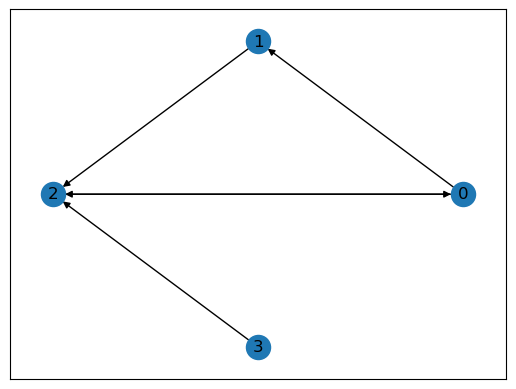

In [15]:
G = nx.MultiDiGraph()
G.add_edge(0, 1, weight=0.5)
G.add_edge(0, 2, weight=0.5)
G.add_edge(1, 2, weight=1.0)
G.add_edge(2, 0, weight=1.0)
G.add_edge(3, 2, weight=1.0)

nx.draw_networkx(G, pos=nx.circular_layout(G), with_labels=True)

gpy = nx.to_numpy_array(G)
gpy

In [16]:
gpy.T

array([[0. , 0. , 1. , 0. ],
       [0.5, 0. , 0. , 0. ],
       [0.5, 1. , 0. , 1. ],
       [0. , 0. , 0. , 0. ]])

In [17]:
gpy[0]

array([0. , 0.5, 0.5, 0. ])

In [18]:
pagerank(gpy, eps=0.0001, d=0.85)

P [0.25 0.25 0.25 0.25]


array([0.37253149, 0.19581382, 0.39415469, 0.0375    ])

In [19]:
pr = nx.pagerank(G, alpha=0.85)
pr

{0: 0.3725262460913331,
 1: 0.19582365458881656,
 2: 0.39415009931985023,
 3: 0.037500000000000006}

In [20]:
sum( pr.values() )

0.9999999999999999

Create a larger graph

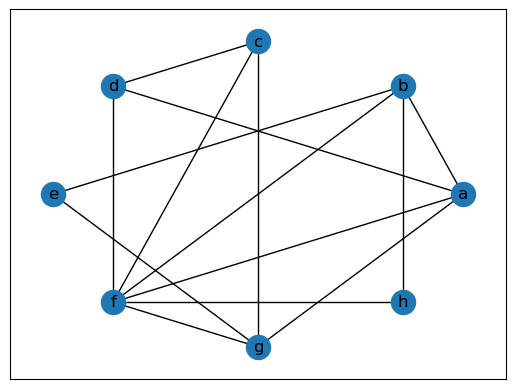

{'a': 0.1386128491958994,
 'b': 0.14389637457383503,
 'c': 0.10803464382596671,
 'd': 0.1075868340719327,
 'e': 0.07935756195948486,
 'f': 0.20309787566516102,
 'g': 0.1413134871083438,
 'h': 0.07810037359937619}

In [21]:
import itertools
import random

import networkx as nx
from matplotlib import pyplot as plt

nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

# Generate Networkx Graph
G = nx.Graph()
G.add_nodes_from(nodes)

# randomly determine vertices
for (node1, node2) in itertools.combinations(nodes, 2):
    if random.random() < 0.5:
        G.add_edge(node1, node2)

# Draw generated graph
nx.draw_networkx(G, pos=nx.circular_layout(G), with_labels=True)

# Compute Page Rank
pr = nx.pagerank(G, alpha=0.85)

plt.show()

pr

In [22]:
npg = nx.to_numpy_array(G)

In [23]:
npg

array([[0., 1., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0.],
       [1., 1., 1., 1., 0., 0., 1., 1.],
       [1., 0., 1., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0.]])

In [24]:
pr

{'a': 0.1386128491958994,
 'b': 0.14389637457383503,
 'c': 0.10803464382596671,
 'd': 0.1075868340719327,
 'e': 0.07935756195948486,
 'f': 0.20309787566516102,
 'g': 0.1413134871083438,
 'h': 0.07810037359937619}

In [25]:
G.nodes

# list(G.adj[1])  # or list(G.neighbors(1))

# G.degree[1]  # the number of edges incident to 1

NodeView(('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'))

In [26]:
list(G.edges)

[('a', 'b'),
 ('a', 'd'),
 ('a', 'f'),
 ('a', 'g'),
 ('b', 'e'),
 ('b', 'f'),
 ('b', 'h'),
 ('c', 'd'),
 ('c', 'f'),
 ('c', 'g'),
 ('d', 'f'),
 ('e', 'g'),
 ('f', 'g'),
 ('f', 'h')]

Create network using networkx methods

In [27]:
G = nx.MultiDiGraph()
G.add_edge(0, 1, weight=2)

G.add_edge(1, 0)

G.add_edge(2, 2, weight=3)

G.add_edge(2, 2)

nx.to_numpy_matrix(G, nodelist=[0, 1, 2])

matrix([[0., 2., 0.],
        [1., 0., 0.],
        [0., 0., 4.]])

In [28]:
nx.to_numpy_array(G)

array([[0., 2., 0.],
       [1., 0., 0.],
       [0., 0., 4.]])